In [2]:
from packaging import version
# from tensorflow.python.summary.summary_iterator import summary_iterator

import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats
# import tensorboard as tb

In [60]:
major_ver, minor_ver, _ = version.parse(tb.__version__).release
assert major_ver >= 2 and minor_ver >= 3, \
    "This notebook requires TensorBoard 2.3 or later."
print("TensorBoard version: ", tb.__version__)

TensorBoard version:  2.12.3


In [61]:
# load conf-1 log
conf_1_linear_df = pd.read_csv('logs/conf-1_model_weighted_CCE_60_1_1e-06_asvspoof_2019_linear_2l_all.csv')
conf_1_resnet_df = pd.read_csv('logs/conf-1_model_weighted_CCE_80_1_1e-07_asvspoof_2019_resnet_2l_all.csv')

# load conf-2 log
conf_2_linear_df = pd.read_csv('logs/conf-2_model_weighted_CCE_80_1_1e-07_aug_asvspoof_2019_linear_nll_2l_online.csv')
conf_2_resnet_df = pd.read_csv('logs/conf-2_model_weighted_CCE_80_1_1e-07_aug_asvspoof_2019_resnet_nll_online_2.csv')

# load conf-3 log
conf_3_linear_df = pd.read_csv('logs/conf-3_model_weighted_CCE_80_1_1e-07_3_augall_asvspoof2019_linear_nll_2l.csv')
conf_3_resnet_df = pd.read_csv('logs/conf-3_model_weighted_CCE_80_1_1e-07_3_augall_asvspoof2019_resnet_nll_2l.csv')

In [62]:
# train_accuracy plot
conf_1_linear_train_acc = conf_1_linear_df[conf_1_linear_df['tag'] == 'train_accuracy']['value'][:30]
conf_1_resnet_train_acc = conf_1_resnet_df[conf_1_resnet_df['tag'] == 'train_accuracy']['value'][:30]

conf_2_linear_train_acc = conf_2_linear_df[conf_2_linear_df['tag'] == 'train_accuracy']['value'][:30]
conf_2_resnet_train_acc = conf_2_resnet_df[conf_2_resnet_df['tag'] == 'train_accuracy']['value'][:30]

conf_3_linear_train_acc = conf_3_linear_df[conf_3_linear_df['tag'] == 'train_accuracy']['value'][:30]
conf_3_resnet_train_acc = conf_3_resnet_df[conf_3_resnet_df['tag'] == 'train_accuracy']['value'][:30]

# print(conf_1_linear_train_acc)
print(type(conf_1_linear_train_acc))
df = pd.DataFrame({'conf-1 Linear': conf_1_linear_train_acc, 'conf-1 ResNet': conf_1_resnet_train_acc,
                'conf-2 Linear': conf_2_linear_train_acc, 'conf-2 ResNet': conf_2_resnet_train_acc,
                'conf-3 Linear': conf_3_linear_train_acc, 'conf-3 ResNet': conf_3_resnet_train_acc})
df.index = range(1, 31)
# df.head




<class 'pandas.core.series.Series'>


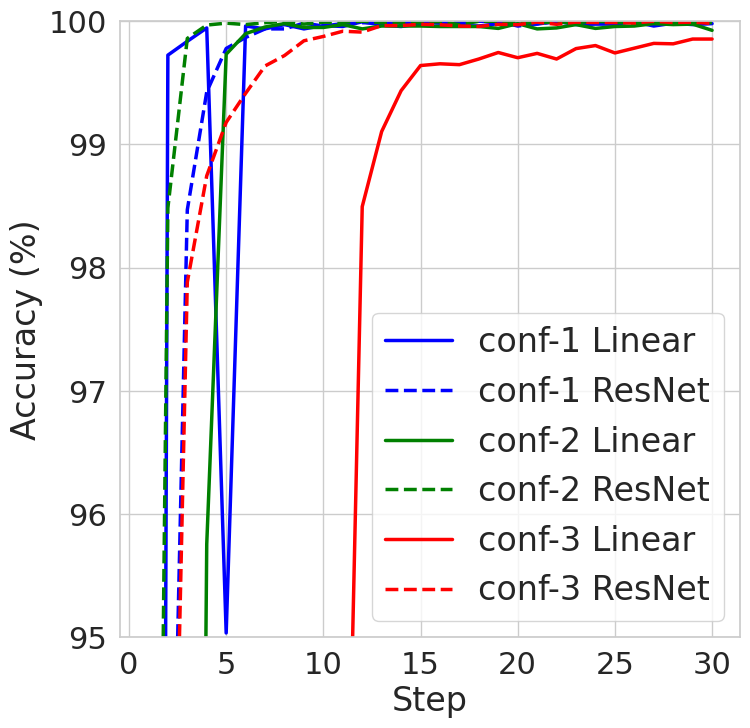

In [63]:
# Set the style of the seaborn plot grid
sns.set_style("whitegrid")

# Set the figure size
plt.figure(figsize=(8, 8))

# Set color and style of the plot
models = ['conf-1 Linear', 'conf-1 ResNet', 'conf-2 Linear', 'conf-2 ResNet', 'conf-3 Linear', 'conf-3 ResNet']
colors = ['blue', 'blue', 'green', 'green', 'red', 'red']
linestyles = ['-', '--', '-', '--', '-', '--']  # Must be the same length as the number of models


for model, color, linestyle in zip(models, colors, linestyles):
    plt.plot(df.index, df[model], linestyle=linestyle, color=color, linewidth=2.5, label=model)

# Set title with a specific font size
# plt.title("Model Training Accuracy over epochs", fontsize=24)

# Set x and y labels with specific font sizes
plt.xlabel('Step', fontsize=24)
plt.ylabel('Accuracy (%)', fontsize=24)

plt.xticks(fontsize=22)
plt.yticks(fontsize=22)

plt.ylim(95, 100)

# Set legend parameters
plt.legend(fontsize=24)

# save
plt.savefig('pics/train_acc.pdf', dpi=600)

# Show plot
plt.show()



# close
plt.close()

In [64]:
# val_accuracy plot
conf_1_linear_val_acc = conf_1_linear_df[conf_1_linear_df['tag'] == 'val_accuracy']['value'][:30]
conf_1_resnet_val_acc = conf_1_resnet_df[conf_1_resnet_df['tag'] == 'val_accuracy']['value'][:30]

conf_2_linear_val_acc = conf_2_linear_df[conf_2_linear_df['tag'] == 'val_accuracy']['value'][:30]
conf_2_resnet_val_acc = conf_2_resnet_df[conf_2_resnet_df['tag'] == 'val_accuracy']['value'][:30]

conf_3_linear_val_acc = conf_3_linear_df[conf_3_linear_df['tag'] == 'val_accuracy']['value'][:30]
conf_3_resnet_val_acc = conf_3_resnet_df[conf_3_resnet_df['tag'] == 'val_accuracy']['value'][:30]

# print(conf_1_linear_val_acc)
print(type(conf_1_linear_val_acc))
df = pd.DataFrame({'conf-1 Linear': conf_1_linear_val_acc, 'conf-1 ResNet': conf_1_resnet_val_acc,
                'conf-2 Linear': conf_2_linear_val_acc, 'conf-2 ResNet': conf_2_resnet_val_acc,
                'conf-3 Linear': conf_3_linear_val_acc, 'conf-3 ResNet': conf_3_resnet_val_acc})
df.index = range(1, 31)
# df.head
df_melt = df.reset_index().melt('index')
df_melt.columns = ['Epoch', 'Model', 'Accuracy']


<class 'pandas.core.series.Series'>


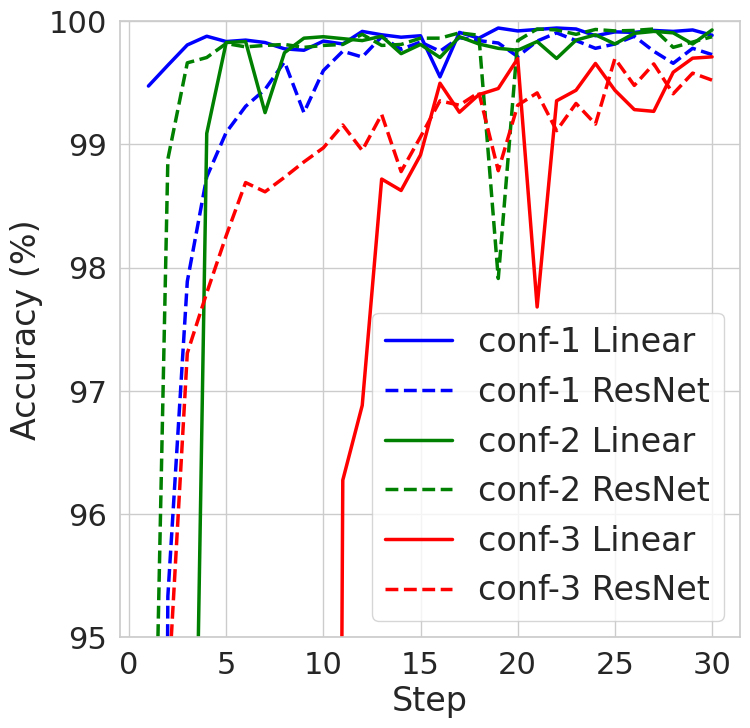

In [65]:
# Set the style of the seaborn plot grid
sns.set_style("whitegrid")

# Set the figure size
plt.figure(figsize=(8, 8))

# Set color and style of the plot
models = ['conf-1 Linear', 'conf-1 ResNet', 'conf-2 Linear', 'conf-2 ResNet', 'conf-3 Linear', 'conf-3 ResNet']
colors = ['blue', 'blue', 'green', 'green', 'red', 'red']
linestyles = ['-', '--', '-', '--', '-', '--']  # Must be the same length as the number of models


for model, color, linestyle in zip(models, colors, linestyles):
    plt.plot(df.index, df[model], linestyle=linestyle, color=color, linewidth=2.5, label=model)

# Set title with a specific font size
# plt.title("Model Training Accuracy over epochs", fontsize=24)

# Set x and y labels with specific font sizes
plt.xlabel('Step', fontsize=24)
plt.ylabel('Accuracy (%)', fontsize=24)

plt.xticks(fontsize=22)
plt.yticks(fontsize=22)

plt.ylim(95, 100)

# Set legend parameters
plt.legend(fontsize=24)

# save
plt.savefig('pics/val_acc.pdf', dpi=600)

# Show plot
plt.show()



# close
plt.close()

In [66]:
# loss plot
conf_1_linear_loss = conf_1_linear_df[conf_1_linear_df['tag'] == 'loss']['value'][:30]*10
conf_1_resnet_loss = conf_1_resnet_df[conf_1_resnet_df['tag'] == 'loss']['value'][:30]*10

conf_2_linear_loss = conf_2_linear_df[conf_2_linear_df['tag'] == 'loss']['value'][:30]
conf_2_resnet_loss = conf_2_resnet_df[conf_2_resnet_df['tag'] == 'loss']['value'][:30]

conf_3_linear_loss = conf_3_linear_df[conf_3_linear_df['tag'] == 'loss']['value'][:30]
conf_3_resnet_loss = conf_3_resnet_df[conf_3_resnet_df['tag'] == 'loss']['value'][:30]

# print(conf_1_linear_loss)
print(type(conf_1_linear_loss))
df = pd.DataFrame({'conf-1 Linear': conf_1_linear_loss, 'conf-1 ResNet': conf_1_resnet_loss,
                'conf-2 Linear': conf_2_linear_loss, 'conf-2 ResNet': conf_2_resnet_loss,
                'conf-3 Linear': conf_3_linear_loss, 'conf-3 ResNet': conf_3_resnet_loss})
df.index = range(1, 31)
# df.head
df_melt = df.reset_index().melt('index')
df_melt.columns = ['Epoch', 'Model', 'Loss']

<class 'pandas.core.series.Series'>


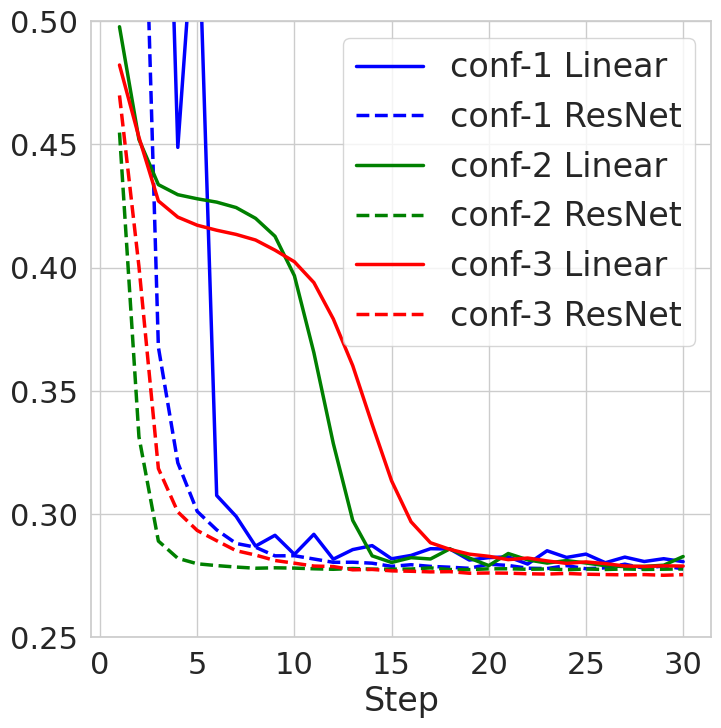

In [67]:
# Set the style of the seaborn plot grid
sns.set_style("whitegrid")

# Set the figure size
plt.figure(figsize=(8, 8))

# Set color and style of the plot
models = ['conf-1 Linear', 'conf-1 ResNet', 'conf-2 Linear', 'conf-2 ResNet', 'conf-3 Linear', 'conf-3 ResNet']
colors = ['blue', 'blue', 'green', 'green', 'red', 'red']
linestyles = ['-', '--', '-', '--', '-', '--']  # Must be the same length as the number of models


for model, color, linestyle in zip(models, colors, linestyles):
    plt.plot(df.index, df[model], linestyle=linestyle, color=color, linewidth=2.5, label=model)

# Set title with a specific font size
# plt.title("Model Training Accuracy over epochs", fontsize=24)

# Set x and y labels with specific font sizes
plt.xlabel('Step', fontsize=24)
# plt.ylabel('Accuracy (%)', fontsize=24)

plt.xticks(fontsize=22)
plt.yticks(fontsize=22)

plt.ylim(0.25, 0.5)

# Set legend parameters
plt.legend(fontsize=24)

# save
plt.savefig('pics/train_loss.pdf', dpi=600)

# Show plot
plt.show()



# close
plt.close()

In [68]:
# val_loss plot
conf_1_linear_val_loss = conf_1_linear_df[conf_1_linear_df['tag'] == 'val_loss']['value'][:30]*10
conf_1_resnet_val_loss = conf_1_resnet_df[conf_1_resnet_df['tag'] == 'val_loss']['value'][:30]*10

conf_2_linear_val_loss = conf_2_linear_df[conf_2_linear_df['tag'] == 'val_loss']['value'][:30]
conf_2_resnet_val_loss = conf_2_resnet_df[conf_2_resnet_df['tag'] == 'val_loss']['value'][:30]

conf_3_linear_val_loss = conf_3_linear_df[conf_3_linear_df['tag'] == 'val_loss']['value'][:30]
conf_3_resnet_val_loss = conf_3_resnet_df[conf_3_resnet_df['tag'] == 'val_loss']['value'][:30]

# print(conf_1_linear_val_loss)
print(type(conf_1_linear_val_loss))
df = pd.DataFrame({'conf-1 Linear': conf_1_linear_val_loss, 'conf-1 ResNet': conf_1_resnet_val_loss,
                'conf-2 Linear': conf_2_linear_val_loss, 'conf-2 ResNet': conf_2_resnet_val_loss,
                'conf-3 Linear': conf_3_linear_val_loss, 'conf-3 ResNet': conf_3_resnet_val_loss})
df.index = range(1, 31)
# df.head
df_melt = df.reset_index().melt('index')
df_melt.columns = ['Epoch', 'Model', 'Loss']


<class 'pandas.core.series.Series'>


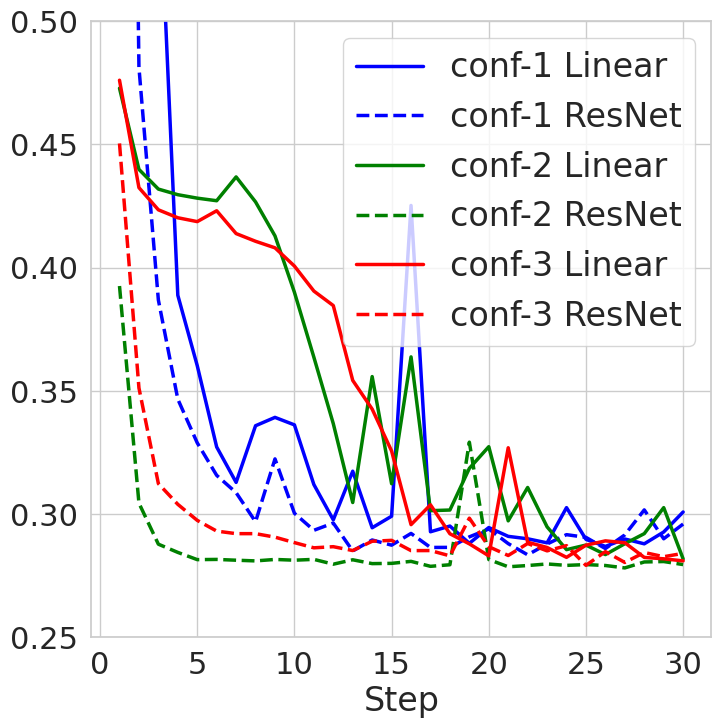

In [69]:
# Set the style of the seaborn plot grid
sns.set_style("whitegrid")

# Set the figure size
plt.figure(figsize=(8, 8))

# Set color and style of the plot
models = ['conf-1 Linear', 'conf-1 ResNet', 'conf-2 Linear', 'conf-2 ResNet', 'conf-3 Linear', 'conf-3 ResNet']
colors = ['blue', 'blue', 'green', 'green', 'red', 'red']
linestyles = ['-', '--', '-', '--', '-', '--']  # Must be the same length as the number of models


for model, color, linestyle in zip(models, colors, linestyles):
    plt.plot(df.index, df[model], linestyle=linestyle, color=color, linewidth=2.5, label=model)

# Set title with a specific font size
# plt.title("Model Training Accuracy over epochs", fontsize=24)

# Set x and y labels with specific font sizes
plt.xlabel('Step', fontsize=24)
# plt.ylabel('Accuracy (%)', fontsize=24)

plt.xticks(fontsize=22)
plt.yticks(fontsize=22)

plt.ylim(0.25, 0.5)

# Set legend parameters
plt.legend(fontsize=24)

# save
plt.savefig('pics/val_loss.pdf', dpi=600)

# Show plot
plt.show()


# close
plt.close()

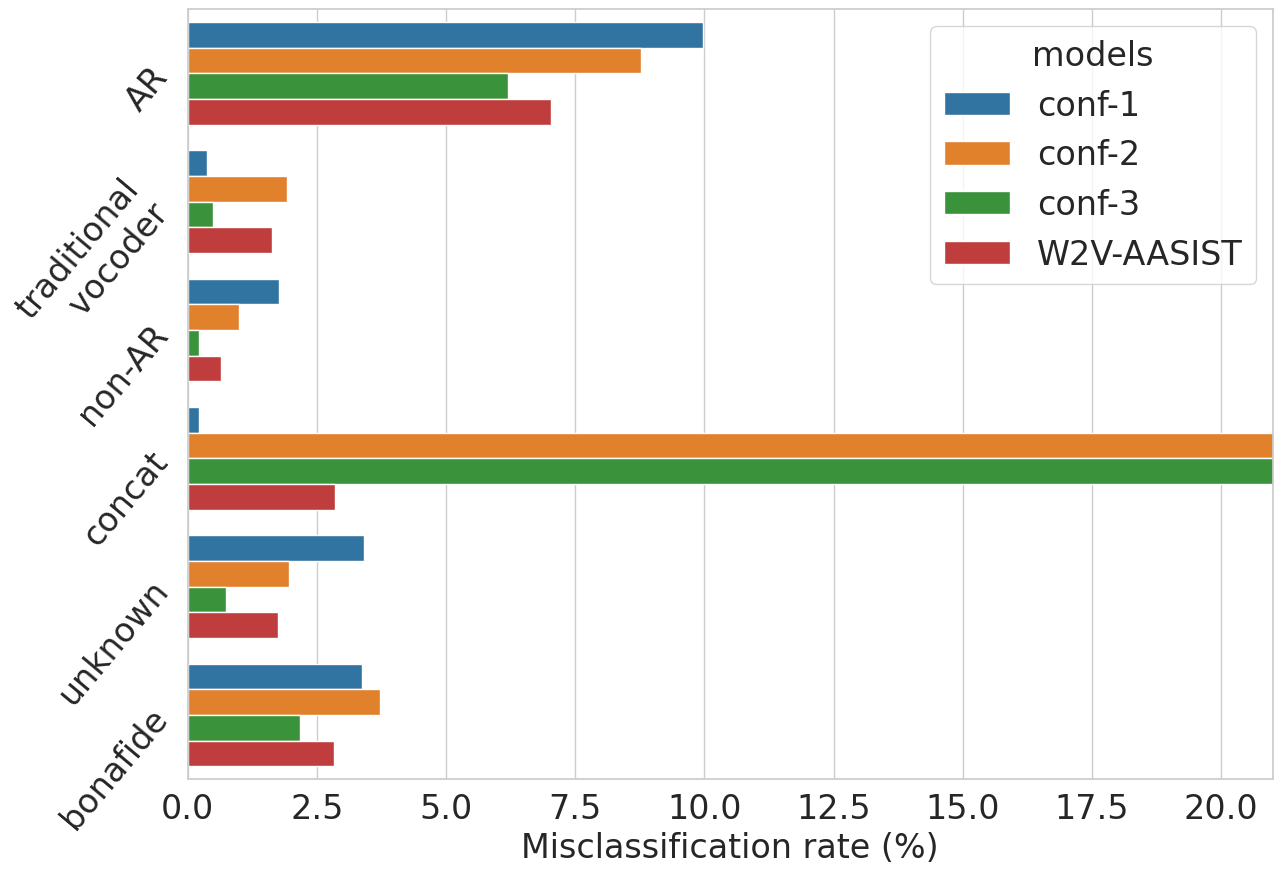

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assume 'data' is your DataFrame 
# data = pd.read_csv('misclassified.csv')
# print(data.head())

# This is how it should look like:
data = pd.DataFrame({
    'type': ['AR', 'traditional\nvocoder', 'non-AR', 'concat', 'unknown', 'bonafide'] * 4,
    'misclassification_percentage': [9.98, 0.38, 1.77, 0.22, 3.42, 3.37, 
                                     8.77, 1.93, 1.00, 21.27, 1.96, 3.73,
                                      6.19, 0.49, 0.21, 21.79, 0.75, 2.17, 
                                      7.04, 1.63, 0.65, 2.85, 1.75, 2.84, 
                                      ],
    'model': ['conf-1', 'conf-1', 'conf-1', 'conf-1', 'conf-1', 'conf-1',
              'conf-2', 'conf-2', 'conf-2', 'conf-2', 'conf-2', 'conf-2', 
           'conf-3', 'conf-3', 'conf-3', 'conf-3', 'conf-3', 'conf-3', 
           'W2V-AASIST', 'W2V-AASIST', 'W2V-AASIST', 'W2V-AASIST','W2V-AASIST','W2V-AASIST', 
           ]
})

# create the seaborn bar plot
plt.figure(figsize=[14,10])
sns.set_theme(style="whitegrid")
p = sns.barplot(x='misclassification_percentage', y='type', hue='model', data=data,errorbar=None, palette='tab10')

# add title and labels
# plt.title('Misclassification percentages by type and model', fontsize=22)
plt.ylabel('', fontsize=24)
plt.xlabel('Misclassification rate (%)', fontsize=24)
plt.xticks(fontsize=24,rotation=0)
plt.yticks(fontsize=24, rotation=50)

# set max value for x-axis
plt.xlim(0, 21)

# tweak the legend
p.legend(title='models', fontsize=24, title_fontsize=24)
# p.legend_.set_bbox_to_anchor((1, 1))  # to place the legend outside the plot

# save the plot
plt.savefig('pics/misclassified_new.pdf', dpi=600)
# show the plot
plt.show()
